In [4]:
pip install qiskit-machine-learning


     -------------------------------------- 97.8/97.8 kB 931.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy matplotlib qiskit qiskit-machine-learning scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data


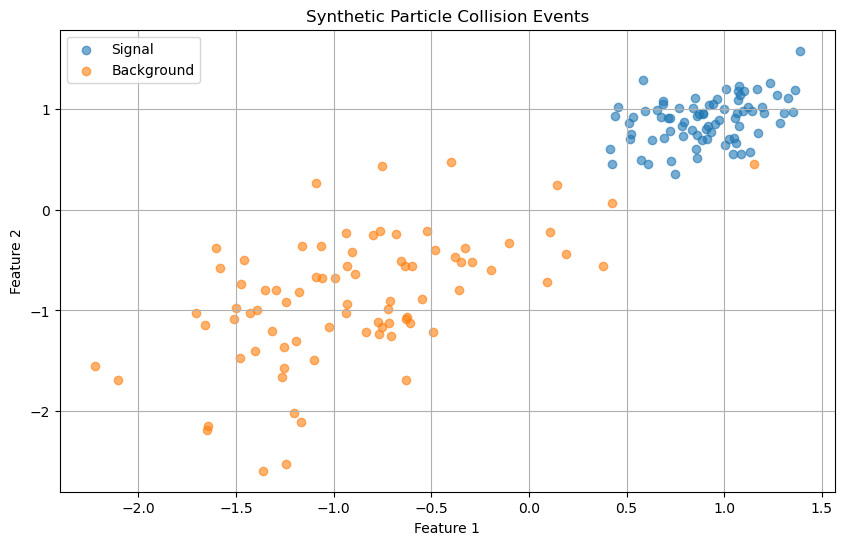

Quantum Model Accuracy: 67.50%
Classical SVM Accuracy: 100.00%


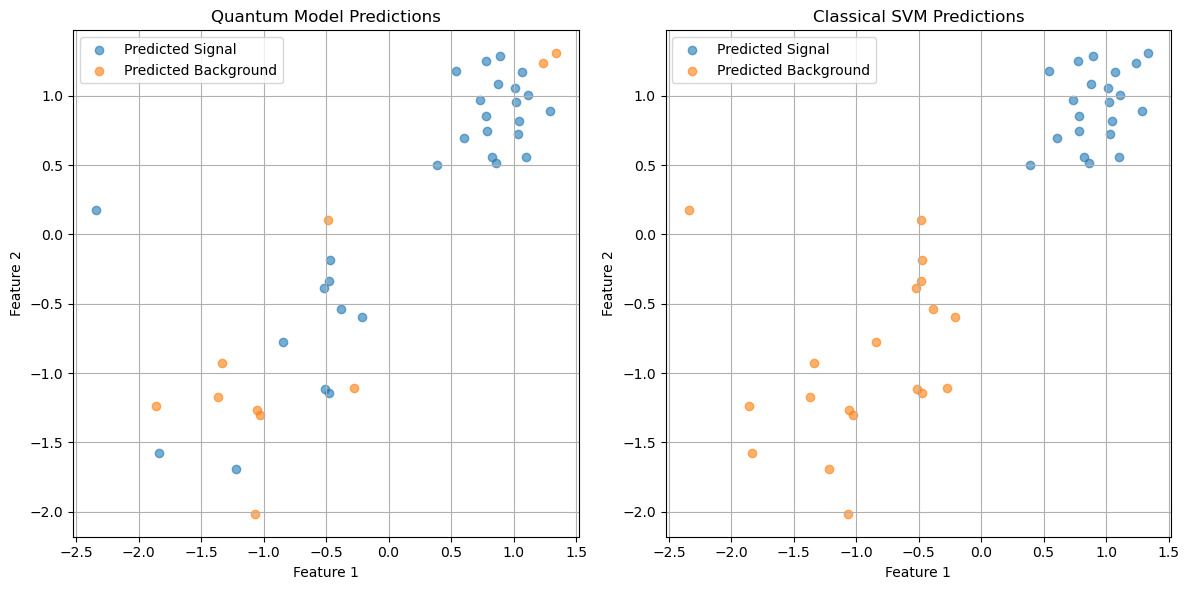

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC

# Seed for reproducibility
np.random.seed(42)

# Function to generate synthetic particle collision data
def generate_synthetic_data(num_samples=200):
    # Generate signal events (Higgs-like)
    signal_data = np.random.multivariate_normal(mean=[1.0, 1.0], cov=[[0.1, 0.05], [0.05, 0.1]], size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)  # Label 1 for signal

    # Generate background events (random collisions)
    background_data = np.random.multivariate_normal(mean=[-1.0, -1.0], cov=[[0.5, 0.2], [0.2, 0.5]], size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)  # Label 0 for background

    # Combine data and labels
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))

    return data, labels

# Generate synthetic data
X, y = generate_synthetic_data(200)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Initialize random seed for reproducibility
algorithm_globals.random_seed = 42

# Create a feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)

# Define the variational circuit
ansatz = TwoLocal(num_qubits=2, rotation_blocks='ry', entanglement='cz', reps=2)

# Create the VQC
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=100))

# Train the VQC
vqc.fit(X_train, y_train)

# Train the classical SVM model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predict with both models
y_pred_qml = vqc.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy for both models
accuracy_qml = accuracy_score(y_test, y_pred_qml)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Quantum Model Accuracy: {accuracy_qml * 100:.2f}%")
print(f"Classical SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Plotting results for both models
plt.figure(figsize=(12, 6))

# Quantum Model Predictions
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_pred_qml == 1][:, 0], X_test[y_pred_qml == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_qml == 0][:, 0], X_test[y_pred_qml == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Quantum Model Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

# Classical Model Predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_pred_svm == 1][:, 0], X_test[y_pred_svm == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_svm == 0][:, 0], X_test[y_pred_svm == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Classical SVM Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


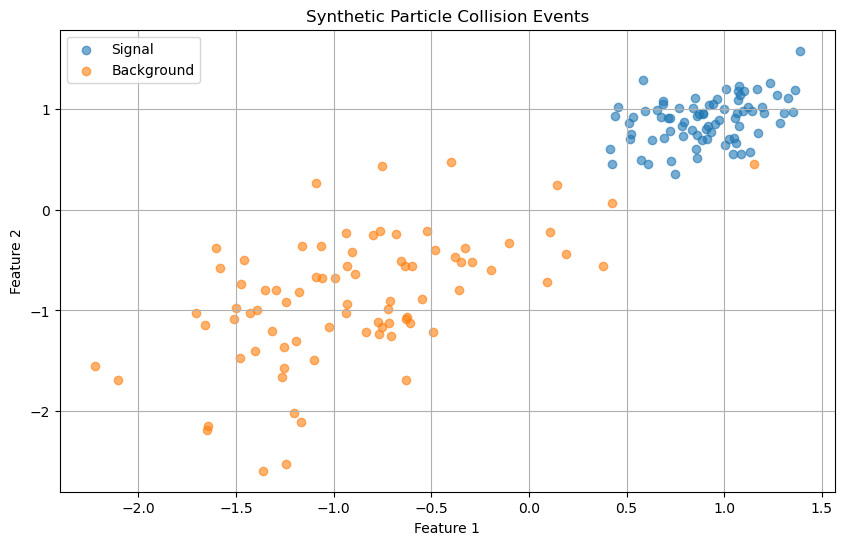

Quantum Model Accuracy: 52.50%
Classical SVM Accuracy: 100.00%


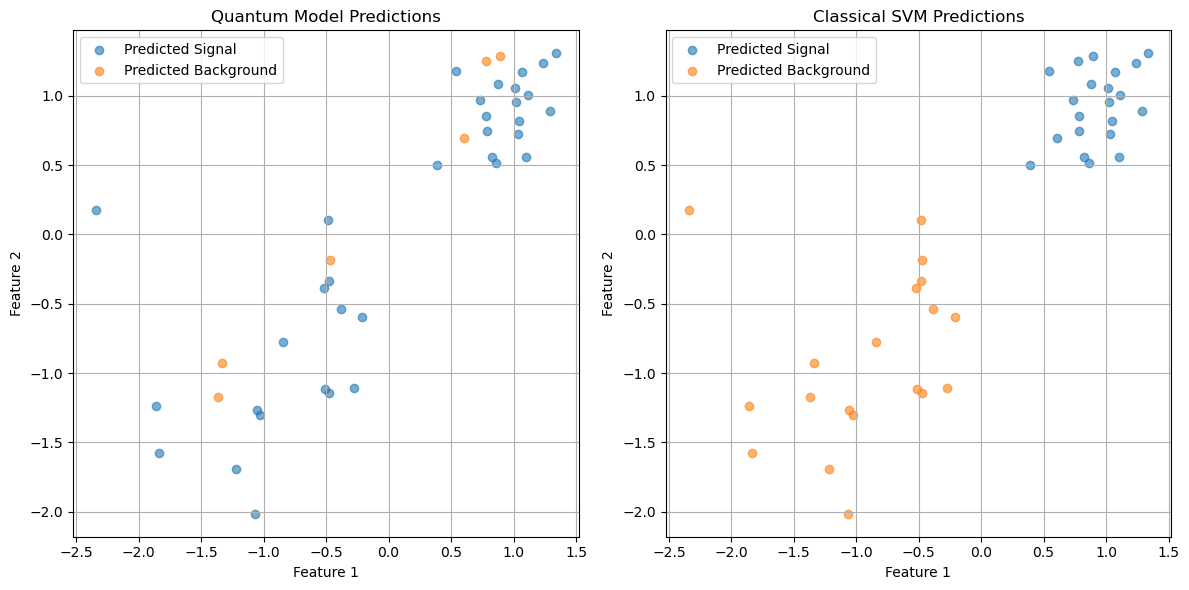

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC

# Seed for reproducibility
np.random.seed(42)

# Function to generate synthetic particle collision data
def generate_synthetic_data(num_samples=200):
    # Generate signal events (Higgs-like)
    signal_data = np.random.multivariate_normal(mean=[1.0, 1.0], cov=[[0.1, 0.05], [0.05, 0.1]], size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)  # Label 1 for signal

    # Generate background events (random collisions)
    background_data = np.random.multivariate_normal(mean=[-1.0, -1.0], cov=[[0.5, 0.2], [0.2, 0.5]], size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)  # Label 0 for background

    # Combine data and labels
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))

    return data, labels

# Generate synthetic data
X, y = generate_synthetic_data(200)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Initialize random seed for reproducibility
algorithm_globals.random_seed = 42

# Create a feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)

# Define the variational circuit
# Create a highly complex ansatz
ansatz = TwoLocal(num_qubits=2,
                  rotation_blocks=['ry', 'rz', 'rx'],  # Multiple rotation gates
                  entanglement='full',                  # Full entanglement for complex correlations
                  reps=4,                               # Increased repetitions for depth
                  skip_unentangled_qubits=False,       # Keep all qubits entangled
                  parameter_prefix='vqc_')              # Optional prefix for parameters

# Create the VQC
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=100))

# Train the VQC
vqc.fit(X_train, y_train)

# Train the classical SVM model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predict with both models
y_pred_qml = vqc.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy for both models
accuracy_qml = accuracy_score(y_test, y_pred_qml)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Quantum Model Accuracy: {accuracy_qml * 100:.2f}%")
print(f"Classical SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Plotting results for both models
plt.figure(figsize=(12, 6))

# Quantum Model Predictions
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_pred_qml == 1][:, 0], X_test[y_pred_qml == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_qml == 0][:, 0], X_test[y_pred_qml == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Quantum Model Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

# Classical Model Predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_pred_svm == 1][:, 0], X_test[y_pred_svm == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_svm == 0][:, 0], X_test[y_pred_svm == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Classical SVM Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


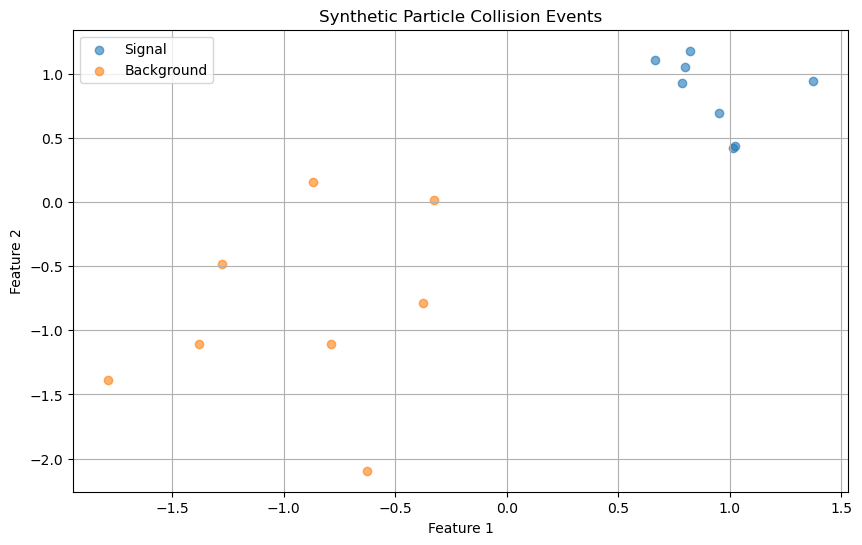

Quantum Model Accuracy: 75.00%
Classical SVM Accuracy: 100.00%


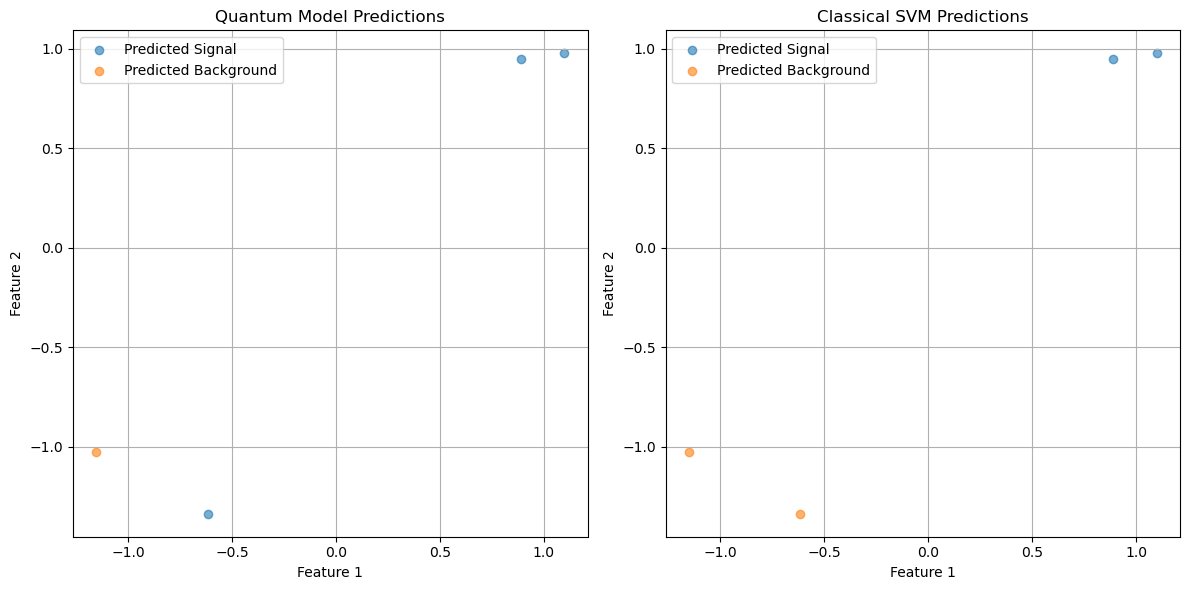

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import TwoLocal, ZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_synthetic_data(num_samples=20):
    signal_data = np.random.multivariate_normal(mean=[1.0, 1.0, 1.0, 1.0], cov=np.eye(4) * 0.1, size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)
    background_data = np.random.multivariate_normal(mean=[-1.0, -1.0, -1.0, -1.0], cov=np.eye(4) * 0.5, size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))
    return data, labels

X, y = generate_synthetic_data(20)

# Split and standardize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Feature map and variational circuit
algorithm_globals.random_seed = 42
feature_map = ZFeatureMap(feature_dimension=4, reps=2)
ansatz = TwoLocal(num_qubits=4, rotation_blocks=['ry', 'rz', 'rx'], entanglement='full', reps=5)

# Create the VQC
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=100))
vqc.fit(X_train, y_train)

# Train classical SVM model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_qml = vqc.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

accuracy_qml = accuracy_score(y_test, y_pred_qml)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Quantum Model Accuracy: {accuracy_qml * 100:.2f}%")
print(f"Classical SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_pred_qml == 1][:, 0], X_test[y_pred_qml == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_qml == 0][:, 0], X_test[y_pred_qml == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Quantum Model Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_pred_svm == 1][:, 0], X_test[y_pred_svm == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_svm == 0][:, 0], X_test[y_pred_svm == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Classical SVM Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


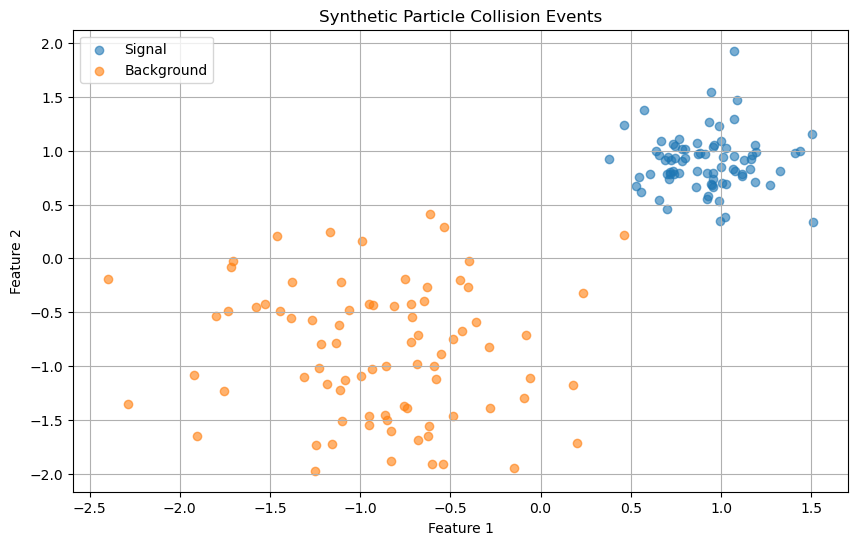

Quantum Model Accuracy: 55.00%
Classical SVM Accuracy: 100.00%


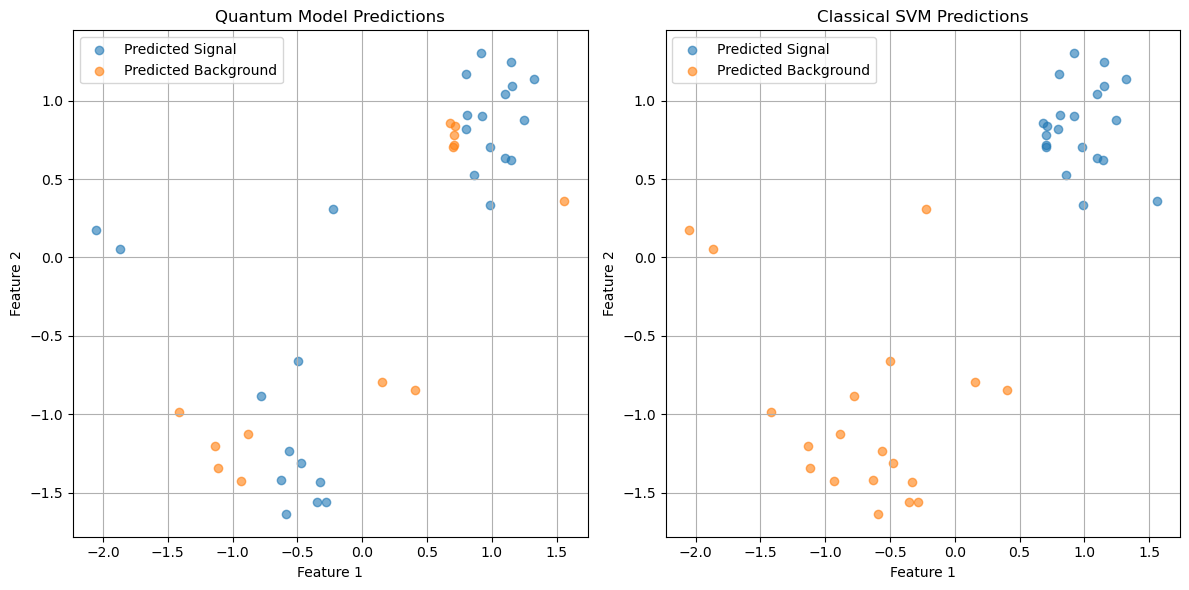

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import TwoLocal, ZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_synthetic_data(num_samples=200):
    signal_data = np.random.multivariate_normal(mean=[1.0, 1.0, 1.0, 1.0], cov=np.eye(4) * 0.1, size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)
    background_data = np.random.multivariate_normal(mean=[-1.0, -1.0, -1.0, -1.0], cov=np.eye(4) * 0.5, size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))
    return data, labels

X, y = generate_synthetic_data(200)

# Split and standardize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Feature map and variational circuit
algorithm_globals.random_seed = 42
feature_map = ZFeatureMap(feature_dimension=4, reps=2)
ansatz = TwoLocal(num_qubits=4, rotation_blocks=['ry', 'rz', 'rx'], entanglement='full', reps=5)

# Create the VQC
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=100))
vqc.fit(X_train, y_train)

# Train classical SVM model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_qml = vqc.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

accuracy_qml = accuracy_score(y_test, y_pred_qml)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Quantum Model Accuracy: {accuracy_qml * 100:.2f}%")
print(f"Classical SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_pred_qml == 1][:, 0], X_test[y_pred_qml == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_qml == 0][:, 0], X_test[y_pred_qml == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Quantum Model Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_pred_svm == 1][:, 0], X_test[y_pred_svm == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_svm == 0][:, 0], X_test[y_pred_svm == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Classical SVM Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


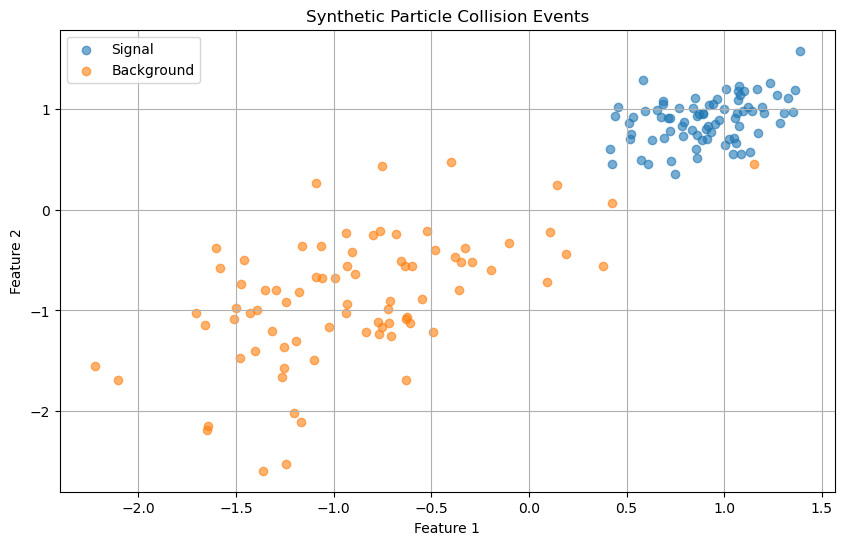

Quantum Model Accuracy: 47.50%
Classical SVM Accuracy: 100.00%


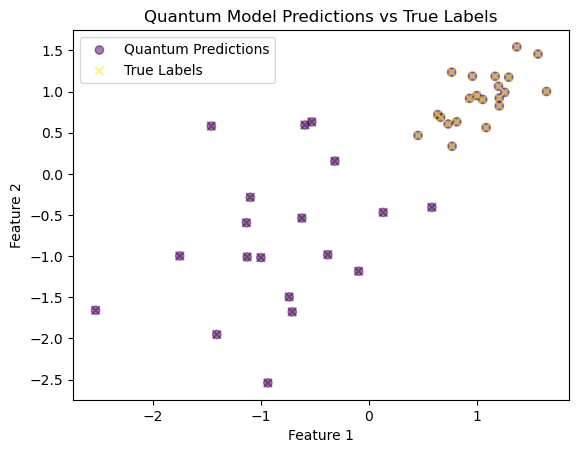

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import QSVC

# Seed for reproducibility
np.random.seed(42)

# Function to generate synthetic particle collision data
def generate_synthetic_data(num_samples=200):
    # Generate signal events (Higgs-like)
    signal_data = np.random.multivariate_normal(mean=[1.0, 1.0], cov=[[0.1, 0.05], [0.05, 0.1]], size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)  # Label 1 for signal

    # Generate background events (random collisions)
    background_data = np.random.multivariate_normal(mean=[-1.0, -1.0], cov=[[0.5, 0.2], [0.2, 0.5]], size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)  # Label 0 for background

    # Combine data and labels
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))

    return data, labels

# Generate synthetic data
X, y = generate_synthetic_data(200)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Create a custom quantum kernel
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Custom quantum kernel function
def custom_quantum_kernel(x1, x2):
    """Custom Quantum Kernel based on overlap of quantum states"""
    # Create a quantum circuit
    circuit = QuantumCircuit(2)
    
    # Apply rotations based on input data
    circuit.ry(x1[0], 0)  # Rotate qubit 0 by x1[0]
    circuit.ry(x1[1], 1)  # Rotate qubit 1 by x1[1]
    
    # Apply a CNOT gate between qubits 0 and 1
    circuit.cx(0, 1)
    
    # Measure the circuit
    circuit.measure_all()

    # Simulate the quantum circuit
    backend = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, backend)
    job = backend.run(transpiled_circuit)
    counts = job.result().get_counts()

    # Calculate kernel value as the probability of measuring the |00> state
    return counts.get('00', 0) / sum(counts.values()) if counts else 0

# Custom QSVC class that utilizes the quantum kernel
class CustomQSVC:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        # Calculate the kernel values with the training data
        kernel_values = np.array([custom_quantum_kernel(x, x_train) for x_train in self.X_train])
        # Implement a simple linear SVM decision rule
        return 1 if np.sum(kernel_values[self.y_train == 1]) > np.sum(kernel_values[self.y_train == 0]) else 0

X, y = generate_synthetic_data(200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the custom quantum classifier
custom_qsvc = CustomQSVC()
custom_qsvc.fit(X_train, y_train)

# Make predictions
y_pred_qsvc = custom_qsvc.predict(X_test)

# Calculate accuracy for custom QSVC
accuracy_qsvc = accuracy_score(y_test, y_pred_qsvc)
print(f"Quantum Model Accuracy: {accuracy_qsvc * 100:.2f}%")

# Train a classical SVC for comparison
classical_svc = SVC(kernel='rbf')
classical_svc.fit(X_train, y_train)
y_pred_classical = classical_svc.predict(X_test)

# Calculate accuracy for classical SVC
accuracy_classical = accuracy_score(y_test, y_pred_classical)
print(f"Classical SVM Accuracy: {accuracy_classical * 100:.2f}%")

# Visualizing the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_qsvc, marker='o', label='Quantum Predictions', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='True Labels', alpha=0.5)
plt.title("Quantum Model Predictions vs True Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


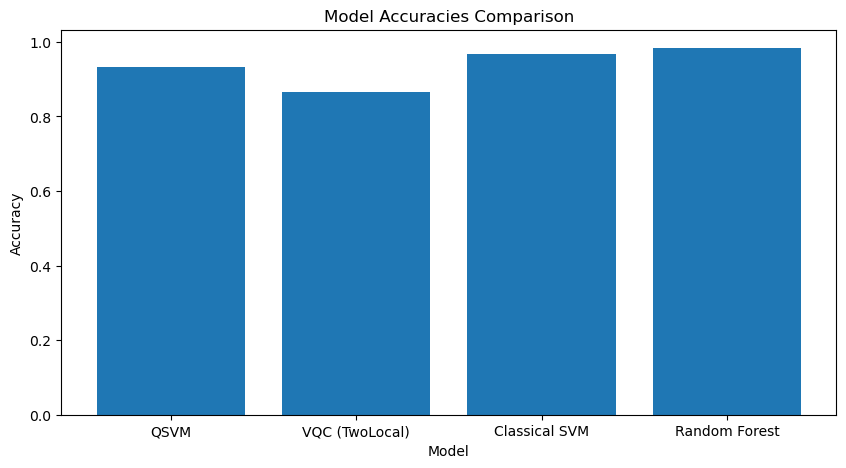

In [2]:
import matplotlib.pyplot as plt

# Data points for the plot
x_axis = ['QSVM', 'VQC (TwoLocal)', 'Classical SVM', 'Random Forest']
y_axis = [0.9333, 0.8667, 0.9667, 0.9833]

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(x_axis, y_axis)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.svm import SVC
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms import QSVC, VQC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.05, random_state=40)

# Train/Test Split: 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

# Quantum Machine Learning (QML) Models
simulator = Aer.get_backend('aer_simulator')

### QSVM
qml_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='full')
qml_kernel = FidelityQuantumKernel(fidelity=fidelity,feature_map=qml_feature_map)
qsvm = QSVC(quantum_kernel=qml_kernel)
qsvm.fit(X_train, y_train)
y_pred_qsvm = qsvm.predict(X_test)
print("QSVM Accuracy:", accuracy_score(y_test, y_pred_qsvm))
### VQC (TwoLocal)
vqc_circuit = TwoLocal(2, ['ry', 'rz'], 'cz', reps=3)
vqc_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='full')
vqc = VQC(ansatz=vqc_circuit, feature_map=vqc_feature_map)
vqc.fit(X_train, y_train)
y_pred_vqc = vqc.predict(X_test)
print("VQC (TwoLocal) Accuracy:", accuracy_score(y_test, y_pred_vqc))
### Classical SVM
svm = SVC(C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Classical SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

### Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

### Classical KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_test)
cluster_pred = kmeans.predict(X_test)
print("Classical KMeans Silhouette Coefficient:", silhouette_score(X_test, cluster_pred))
# Plot 1: Model Accuracies Comparison Bar Chart
plt.figure(figsize=(10, 5))
plt.bar([
    'QSVM', 
    'VQC (TwoLocal)', 
    'Classical SVM', 
    'Random Forest'
], [
    accuracy_score(y_test, y_pred_qsvm), 
    accuracy_score(y_test, y_pred_vqc), 
    accuracy_score(y_test, y_pred_svm), 
    accuracy_score(y_test, y_pred_rf)
])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.show()

# Performance Comparison Summary
print("\n--- Performance Comparison ---")
print(f"QSVM Accuracy: {accuracy_score(y_test, y_pred_qsvm):.4f}")
print(f"VQC (TwoLocal) Accuracy: {accuracy_score(y_test, y_pred_vqc):.4f}")
print(f"Classical SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Classical KMeans Silhouette Coefficient: {silhouette_score(X_test, cluster_pred):.4f}")